## Getting Data

USGS Codes for lamar tower and soda butte: 06188000 , 06187915


### To see all variables availablel for lamar tower

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=06188000&period=P10000000W


### To get only discharge for lamar tower

curl -o lamarTowerQ "http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=06188000&period=P10000000W&parameterCd=00060"


### To get only discharge for soda butte

curl -o sodaButteQ "http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=06187915&period=P10000000W&parameterCd=00060"

### To get guage height for lamar tower (only aailable from march 2015-present)

curl -o sodaButteH "http://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00065=on&format=rdb&site_no=06188000&begin_date=2015-03-01&end_date=2015-06-30"

curl -o sodaButteH "http://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=06188000&begin_date=1990-06-23&end_date=2015-06-30"

Jan 1st 1980 - Dec 31st 2012

In [2]:
setwd("/Users/hoy/Desktop/MSUWC/Data/usgsGuage/")

## Note: missing lamarTower data from 1969-09-30 to 1985-05-01 and 1986-09-30 to 1988-09-01

###SodaButte only has data starting in 1998

In [1]:
library(mailR)

In [58]:
send.mail(from = "jeradhoy@gmail.com",
          to = "jeradhoy@gmail.com",
          subject = "Job Finished",
          body = "Body of the email",
          #smtp = list(host.name = "aspmx.l.google.com", port = 25),
          smtp = list(host.name = "smtp.gmail.com", port = 465, user.name = "jeradhoy", passwd = "tut42495!$", ssl = FALSE),
          authenticate = TRUE,
          send = TRUE)

ERROR: Error in ls(envir = envir, all.names = private): invalid 'envir' argument


In [57]:
meow <- function(a=2){
    return (a)meow


ERROR: Error in parse(text = x, srcfile = src): <text>:2:15: unexpected symbol
1: meow <- function(a=2){
2:     return (a)meow
                 ^


In [46]:
send.mail(from = "jeradhoy@gmail.com",
          to = "jeradhoy@gmail.com",
          subject = "Job Finished - R",
          body = "Body of the email",
          smtp = list(host.name = "aspmx.l.google.com", port = 25),
          authenticate = FALSE,
          send = TRUE)

[1] "Java-Object{org.apache.commons.mail.SimpleEmail@527f58ef}"

In [43]:
dates <- seq(as.Date("1980/1/1"), as.Date("2012/12/31"), by="day")
length(dates)

dates <- dates[c(-grep("02-29", dates))]

length(dates)

[1] 12054

[1] 12045

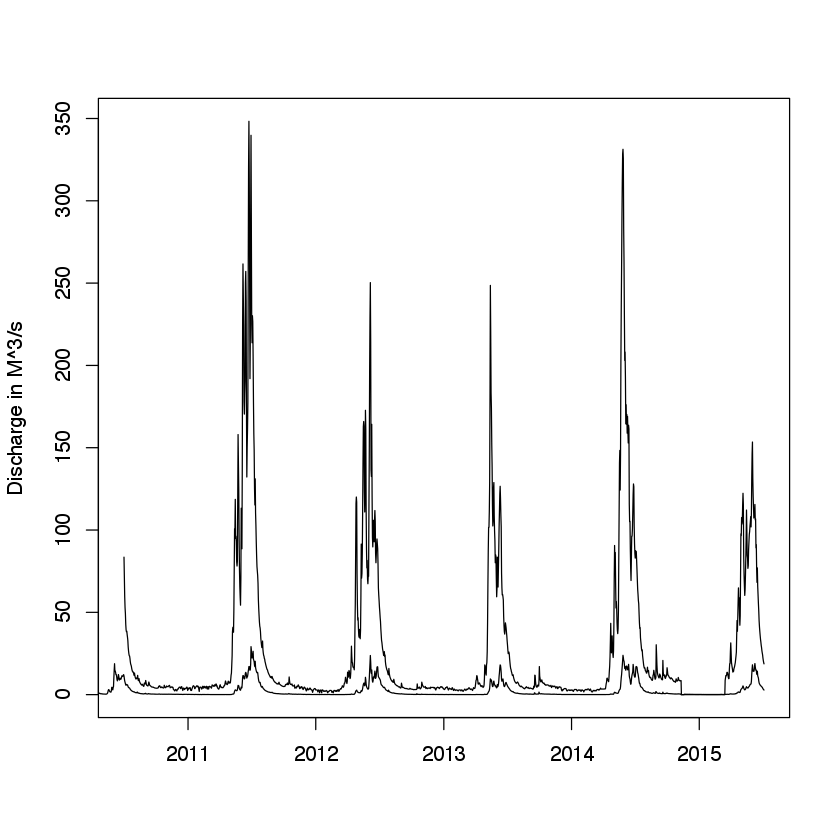

In [57]:
lamarQ<- read.table("lamarTowerQ", header=TRUE, stringsAsFactors = FALSE)
lamarQ <- lamarQ[-c(1),]

lamarQ$X01_00060_00003[lamarQ$X01_00060_00003 == "Ice"] <- 0

lamarQ <- lamarQ[-c(grep("02-29", lamarQ$datetime)),] # to remove leap dates (model doesn't have them)

lamarQ$X01_00060_00003 <- as.numeric(lamarQ$X01_00060_00003)/35.31466666666666667

lamarQtoPlot <- lamarQ[as.Date(lamarQ$datetime) > as.Date("1980-01-01"),]



#plot(as.Date(lamarQtoPlot$datetime), lamarQtoPlot$X01_00060_00003, type="l", ylab="Discharge in M^3/s", xlab=NA)
#plot(as.Date(lamarQ$datetime), lamarQ$X01_00060_00003, type="l", ylab="Discharge in M^3/s", xlab=NA)
data <- tail(lamarQ, n=365*5)
plot(as.Date(data$datetime), data$X01_00060_00003, type="l", ylab="Discharge in M^3/s", xlab=NA)
lines(as.Date(sodaButteQ$datetime), sodaButteQ$X02_00060_00003, type="l")

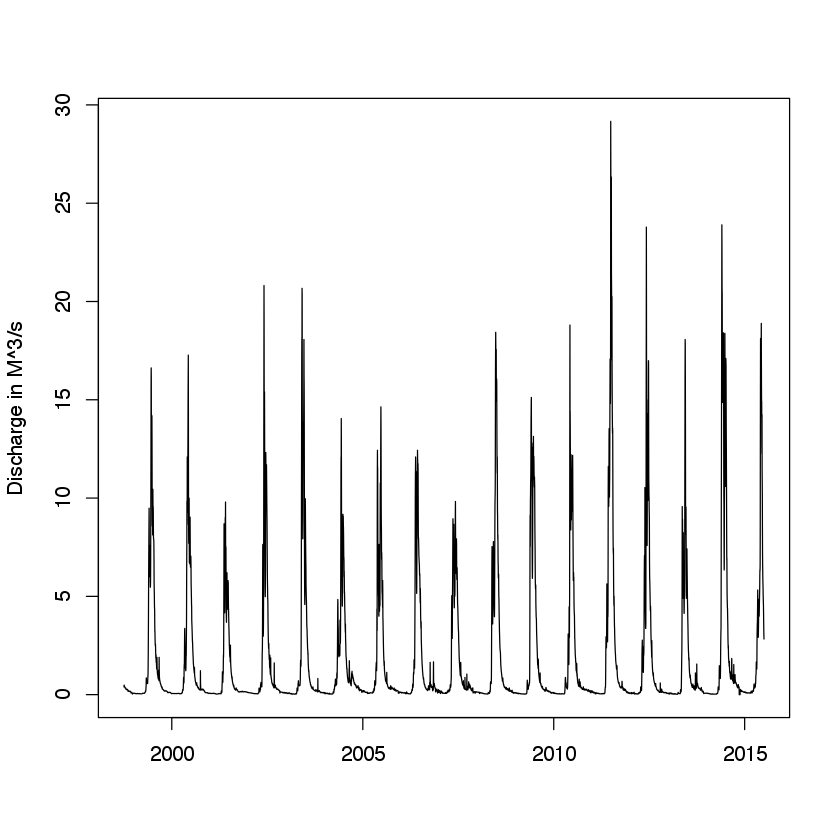

[1] "1998" "1998" "1998" "1998" "1998"

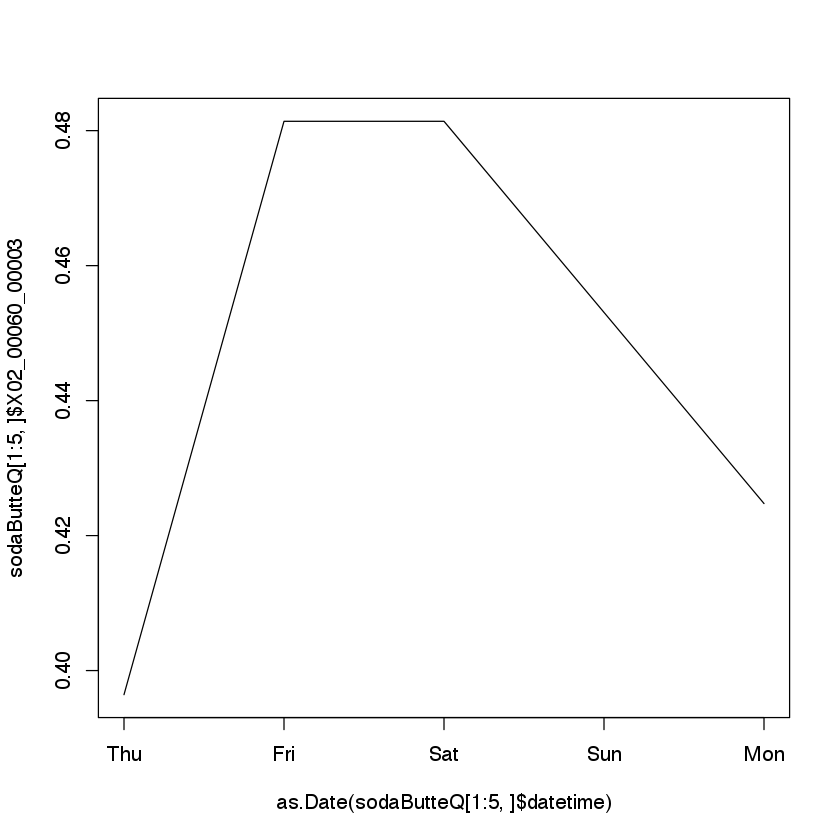

In [58]:
sodaButteQ<- read.table("sodaButteQ", header=TRUE, stringsAsFactors = FALSE)
sodaButteQ <- sodaButteQ[-c(1),]
sodaButteQ$X02_00060_00003[sodaButteQ$X02_00060_00003 == "Ice"] <- 0
sodaButteQ$X02_00060_00003 <- as.numeric(sodaButteQ$X02_00060_00003)/35.31466666666666667
plot(as.Date(sodaButteQ$datetime), sodaButteQ$X02_00060_00003, type="l", ylab="Discharge in M^3/s", xlab=NA)
#plot(tail(sodaButteQ$X02_00060_00003[], n=365*5.5), type="l", ylab="Discharge in M^3/s", xlab=NA)
plot(as.Date(sodaButteQ[1:5,]$datetime), sodaButteQ[1:5,]$X02_00060_00003, type="l")

format(as.Date(sodaButteQ[1:5,]$datetime), "%Y")

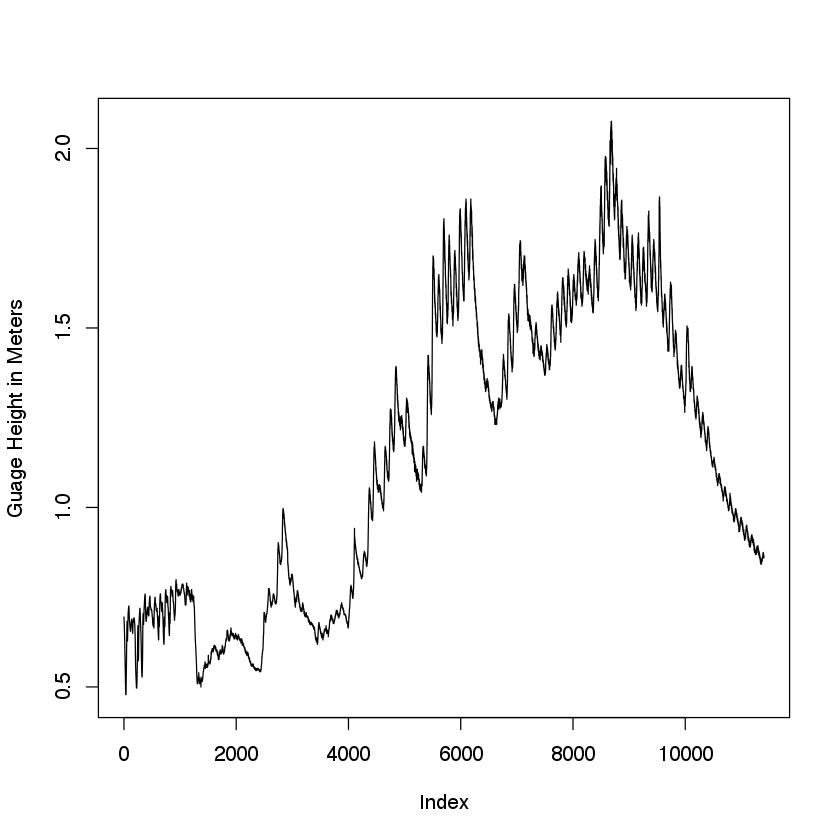

In [14]:
lamarH <- read.table("/Users/hoy/Desktop/MSUWC/Data/usgsGuage/lamarH", header=FALSE, skip=26)#, header=TRUE ,fill=TRUE, stringsAsFactors = FALSE)
lamarH[,6] <- lamarH[,6] / 3.280839895
plot(lamarH[,6], type="l", ylab="Guage Height in Meters")

#lamarQ <- lamarQ[-c(1),]
#lamarQ$X01_00060_00003[lamarQ$X01_00060_00003 == "Ice"] <- 0
#lamarQ$X01_00060_00003 <- as.numeric(lamarQ$X01_00060_00003)/35.31466666666666667
#plot(tail(lamarQ$X01_00060_00003[], n=365*5.5), type="l")